<a href="https://colab.research.google.com/github/Elibaque/SIM_YAC_ELIANA_UPSE2023/blob/main/Ejercicio_3_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np 
import math


In [2]:
L=10000
dx=250
Tiempo=100000
DT=1
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=1**(-6) #ps1-1
A=200000#ft^2

In [3]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

0.004

In [4]:
#Esquema Explicito 
def Presdt(P0,P1,P2,Eta):
  Pdt=P1+Eta*(P0-2*P1+P2)
  return(Pdt)

Pexplicita=np.zeros((Tiempo//DT,L//dx))

In [5]:
#Condiciones inicialea 
Pyac=1000
Piz=100
Pder=0
Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pres2=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder

Pin

array([ 100., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000.,    0.])

In [7]:
t=DT
Pexplicita[0]=Pin
while t<Tiempo:
  for i in range(0,len(Pin)-1):
    if i==0:
      Pres[i]=Pin[0]
    elif i==len(Pin)-1:
      Pres[i]=Pin[len(Pin)-1]
    else:
      Pres[i]=Presdt(Pin[i-1],Pin[i],Pin[i+1],Eta)
  Pexplicita[t//DT]=Pres
  t=t+DT
  Pin=Pres   

In [8]:
print(Pexplicita)

[[1.00000000e+02 8.25291872e+01 6.58989423e+01 ... 7.06294022e-12
  1.68988065e-12 0.00000000e+00]
 [1.00000000e+02 8.25325495e+01 6.59051819e+01 ... 7.12341609e-12
  1.70485527e-12 0.00000000e+00]
 [1.00000000e+02 8.25359098e+01 6.59114179e+01 ... 7.18437481e-12
  1.71995393e-12 0.00000000e+00]
 ...
 [1.00000000e+02 9.70816677e+01 9.41656443e+01 ... 4.42284414e+00
  2.21028047e+00 0.00000000e+00]
 [1.00000000e+02 9.70816770e+01 9.41656627e+01 ... 4.42286250e+00
  2.21028968e+00 0.00000000e+00]
 [1.00000000e+02 9.70816862e+01 9.41656811e+01 ... 4.42288085e+00
  2.21029889e+00 0.00000000e+00]]


In [9]:
Pimplicita=np.zeros((Tiempo//DT,L//dx))
#Condiciones inicialea 
#Condiciones inicialea 
Pyac=1000
Piz=2000
Pder=0

Pin=np.ones(L//dx)
Pres=np.zeros(L//dx)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=L//dx
Matriz_resolucion=np.zeros((N-2,N-2))

In [10]:
for i in range(N-2): #por el valor de los nos que se resta 2 por la frontera no se toma en cuenta
   Matriz_resolucion[i,i]= 1+2*Eta #los diagonales son iguales por eso va i,i= se llenan estos valores
   if i>0: #si vale cero
    Matriz_resolucion[i,i-1]=-Eta # casillas de la izquierda
   if i<(N-3): #Porque no hay valores a la derecha 
    Matriz_resolucion[i,i+1]=-Eta # casilla derecha de la diagonal


In [13]:
Pcal=np.zeros([N-2])
Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1]) # resuelve la ecuacion 
Pres

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [19]:
Pres=np.concatenate(([Piz],Pcal,[Pder]))

In [20]:
Pimplicita[0]=Pin
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Pin[1:-1]) 
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Pin=Pres
  t=t+DT


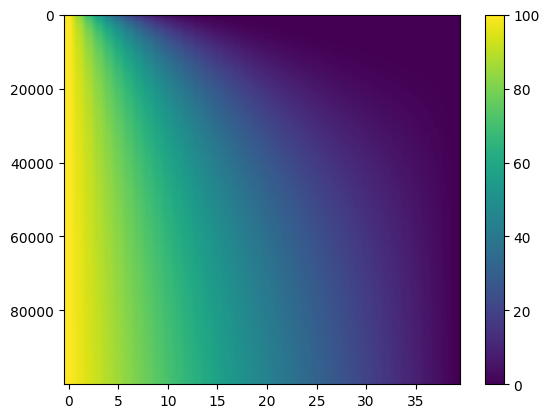

In [17]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(Pexplicita,aspect='auto')
plt.colorbar()
